# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [4]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import math
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.5074589  2.92744994 2.59663963 2.81372759 2.95840588 2.39372061
 2.61906096 2.64443557 2.65778971 2.42499747]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

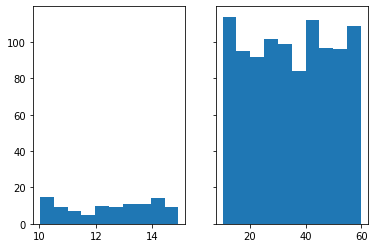

In [22]:
def uniform_dist(bottom, ceiling, count):   
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms = a + (b-a)*x
    return randoms
bot1=10
ceil1=15
count1=100
bot2=10
ceil2=60
count2=1000
r1 = uniform_dist(bot1,ceil1,count1)
r2 = uniform_dist(bot2,ceil2,count2)
fig , ax = plt.subplots(1,2,sharey=True)
ax[0].hist(r1, bins=10)
ax[1].hist(r2, bins=10)
plt.show()

How are the two distributions different?

In [ ]:
# your answer below
# The one on the left is simply lower because its count is significantly lower 
# The range of the two is also different because the ceilings are 15 and 60, but we can see that it is in fact the same underlying distribution


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

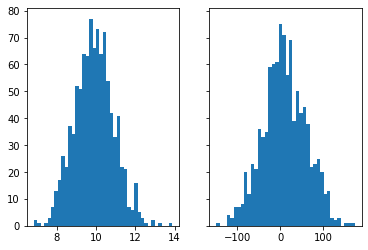

In [27]:
from scipy.stats import norm
def gaussian_dist(average, sd, count=1000):   
    x = norm.rvs(size=count, loc=average, scale=sd)
    return x
average1=10
sd1=1
averge2=10
sd2=50
r1 = gaussian_dist(average1,sd1)
r2 = gaussian_dist(averge2,sd2)
fig , ax = plt.subplots(1,2,sharey=True)
ax[0].hist(r1, bins=40)
ax[1].hist(r2, bins=40)
plt.show()

How are the two distributions different?

In [ ]:
# We can see that they have the same shape to scale, but the one on the right with its sd being significantly higher, has a wider range


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

(array([6.5000e+01, 1.6000e+01, 5.4000e+01, 3.2000e+02, 2.2040e+03,
        4.5610e+03, 1.0248e+04, 6.7910e+03, 4.6130e+03, 4.3530e+03,
        1.3610e+03, 7.3500e+02, 4.3900e+02, 1.3000e+02, 0.0000e+00,
        3.6000e+01, 0.0000e+00, 2.1000e+01, 0.0000e+00, 5.0000e+00]),
 array([ 0.06      ,  2.41135714,  4.76271429,  7.11407143,  9.46542857,
        11.81678571, 14.16814286, 16.5195    , 18.87085714, 21.22221429,
        23.57357143, 25.92492857, 28.27628571, 30.62764286, 32.979     ,
        35.33035714, 37.68171429, 40.03307143, 42.38442857, 44.73578571,
        47.08714286]),
 <BarContainer object of 20 artists>)

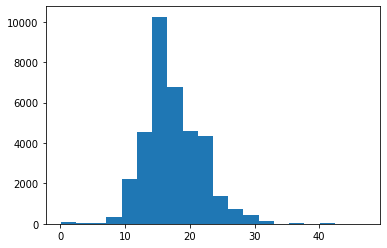

In [33]:
import pandas as pd
data = pd.read_csv('vehicles.csv')
plt.hist(data['Fuel Barrels/Year'], bins=20)

2. CO2 Emission Grams/Mile 

(array([1.300e+01, 2.100e+01, 1.490e+02, 6.830e+02, 3.422e+03, 6.783e+03,
        9.421e+03, 5.990e+03, 2.530e+03, 4.295e+03, 1.276e+03, 7.340e+02,
        4.430e+02, 1.300e+02, 0.000e+00, 3.600e+01, 0.000e+00, 2.100e+01,
        0.000e+00, 5.000e+00]),
 array([  37.        ,   98.62857143,  160.25714286,  221.88571429,
         283.51428571,  345.14285714,  406.77142857,  468.4       ,
         530.02857143,  591.65714286,  653.28571429,  714.91428571,
         776.54285714,  838.17142857,  899.8       ,  961.42857143,
        1023.05714286, 1084.68571429, 1146.31428571, 1207.94285714,
        1269.57142857]),
 <BarContainer object of 20 artists>)

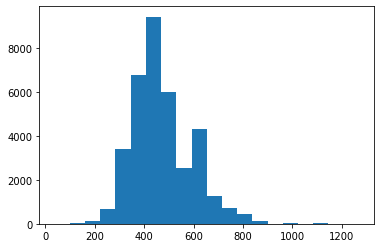

In [34]:
plt.hist(data['CO2 Emission Grams/Mile'], bins=20)

3. Combined MPG

(array([6.600e+01, 5.720e+02, 3.943e+03, 4.556e+03, 9.261e+03, 6.251e+03,
        5.587e+03, 2.345e+03, 1.784e+03, 6.320e+02, 3.450e+02, 2.910e+02,
        8.400e+01, 1.260e+02, 4.400e+01, 2.100e+01, 1.800e+01, 1.500e+01,
        9.000e+00, 2.000e+00]),
 array([ 7.  ,  9.45, 11.9 , 14.35, 16.8 , 19.25, 21.7 , 24.15, 26.6 ,
        29.05, 31.5 , 33.95, 36.4 , 38.85, 41.3 , 43.75, 46.2 , 48.65,
        51.1 , 53.55, 56.  ]),
 <BarContainer object of 20 artists>)

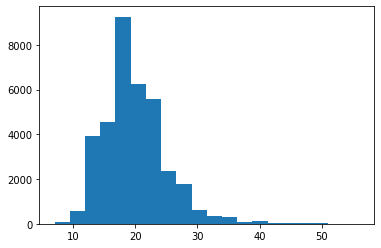

In [35]:
plt.hist(data['Combined MPG'], bins=20)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# All of them look more or less gaussian with a slight slant towards the left

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

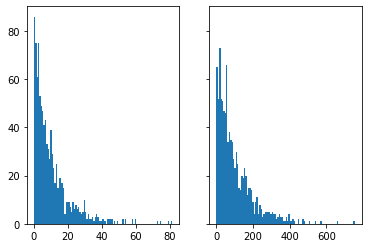

In [46]:
import numpy
def expo(size, scale=10):
    return numpy.random.exponential(scale = 10, size=size)
fig , ax = plt.subplots(1,2,sharey=True)
ax[0].hist(expo(1000), bins=100)
ax[1].hist(expo(1000)*10, bins=100)
plt.show()

How are the two distributions different?

In [ ]:
# They have exactly the same shape but one has values that are 100 times bigger than the other

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [108]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon
expon(scale=10).cdf(15)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [110]:
expon(scale=10).sf(15)

0.22313016014842982